In [1]:
import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

In [52]:
data_path = 'data'
train_path = join(data_path, 'userTrainData.csv')
test_path = join(data_path, 'userTestData.csv')
# , nrows=20000
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [63]:
train_df.head()

,Unnamed: 0,user_id,business_id,stars,text,user_id_int,business_id_int
0,726863,F-XkGoU9tZxZLdGI6JAtZw,NJyTPOukXuLK8vabKw7nvA,3.0,The noodles weren't as al dente as I had hoped...,0,0
1,2577614,t8RWJ-QUJU149W1WdAeruw,gCY17N6YBR8gTMveklFktA,5.0,We've been dining at Ruby Tuesday for about 6 ...,1,1
2,531600,Ahdo2T-uQ-qO-6FM88M4mg,ZtsnwjxjzMUI6tDZNrJUeA,3.0,Place is a hit or miss. Sometimes it is grea...,2,2
3,1708371,_jG88iKcByEQuhBB1Tz_Qw,tK_NS6MD42O0IQHKhp7xag,1.0,"It seems every time I come to this Pharmacy, t...",3,3
4,2009421,gQDLi67PvBxEWsQYAcyMsw,_umqWeKgc9aaOp66guXkUQ,5.0,Clean clinic and friendly staff! Great organiz...,4,4


# Train EDA

In [53]:
train_df.isna().sum()

Unnamed: 0     0
user_id        0
business_id    0
stars          0
text           0
dtype: int64

In [54]:
print("unique values for each column")
train_df.nunique()

unique values for each column


Unnamed: 0     2303580
user_id         239007
business_id     159168
stars                5
text           2302614
dtype: int64

In [55]:
print(f"number of rows : {train_df.shape[0]}")

number of rows : 2303580


In [56]:
unique_users = train_df.user_id.unique()
user_id_str_to_int = dict(zip(unique_users, range(len(unique_users))))
train_df['user_id_int'] = train_df.user_id.apply(user_id_str_to_int.get)

In [57]:
unique_business = train_df.business_id.unique()
business_id_str_to_int = dict(zip(unique_business, range(len(unique_business))))
train_df['business_id_int'] = train_df.business_id.apply(business_id_str_to_int.get)

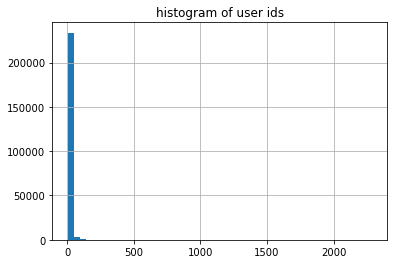

In [58]:
plt.title("histogram of user ids")
train_df.groupby('user_id_int').size().hist(bins = 50);

In [59]:
from collections import Counter
print("number of users by number of instances")
sorted(Counter(train_df.groupby('user_id_int').size()).items(), key = lambda x:x[0])

number of users by number of instances


[(3, 57027),
 (4, 37391),
 (5, 26244),
 (6, 28577),
 (7, 16410),
 (8, 8967),
 (9, 7254),
 (10, 11194),
 (11, 4330),
 (12, 3786),
 (13, 3169),
 (14, 5058),
 (15, 2079),
 (16, 1914),
 (17, 1585),
 (18, 2772),
 (19, 1172),
 (20, 1115),
 (21, 977),
 (22, 1826),
 (23, 799),
 (24, 745),
 (25, 658),
 (26, 1175),
 (27, 521),
 (28, 499),
 (29, 436),
 (30, 820),
 (31, 378),
 (32, 386),
 (33, 362),
 (34, 643),
 (35, 277),
 (36, 280),
 (37, 244),
 (38, 486),
 (39, 214),
 (40, 231),
 (41, 202),
 (42, 363),
 (43, 198),
 (44, 184),
 (45, 164),
 (46, 304),
 (47, 136),
 (48, 121),
 (49, 126),
 (50, 257),
 (51, 103),
 (52, 127),
 (53, 103),
 (54, 221),
 (55, 124),
 (56, 79),
 (57, 93),
 (58, 191),
 (59, 91),
 (60, 81),
 (61, 81),
 (62, 166),
 (63, 77),
 (64, 76),
 (65, 72),
 (66, 130),
 (67, 50),
 (68, 63),
 (69, 65),
 (70, 119),
 (71, 53),
 (72, 66),
 (73, 38),
 (74, 94),
 (75, 57),
 (76, 49),
 (77, 50),
 (78, 82),
 (79, 54),
 (80, 36),
 (81, 43),
 (82, 67),
 (83, 60),
 (84, 30),
 (85, 33),
 (86, 77),


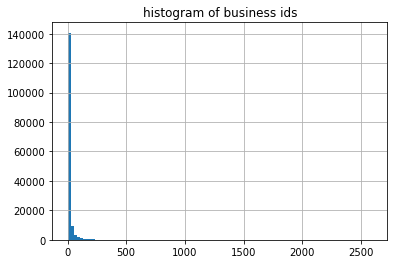

In [71]:
plt.title("histogram of business ids")
train_df.groupby('business_id_int').size().hist(bins = 100);

In [61]:
from collections import Counter
print("number of business by number of instances")
sorted(Counter(train_df.groupby('business_id_int').size()).items(), key=lambda x:x[0])

number of business by number of instances


[(1, 26455),
 (2, 26077),
 (3, 18800),
 (4, 12569),
 (5, 9252),
 (6, 7042),
 (7, 5703),
 (8, 4586),
 (9, 3806),
 (10, 3276),
 (11, 2944),
 (12, 2469),
 (13, 2214),
 (14, 1973),
 (15, 1710),
 (16, 1629),
 (17, 1397),
 (18, 1341),
 (19, 1150),
 (20, 1128),
 (21, 1073),
 (22, 946),
 (23, 853),
 (24, 810),
 (25, 759),
 (26, 715),
 (27, 689),
 (28, 602),
 (29, 585),
 (30, 548),
 (31, 510),
 (32, 498),
 (33, 463),
 (34, 444),
 (35, 434),
 (36, 421),
 (37, 373),
 (38, 383),
 (39, 391),
 (40, 320),
 (41, 300),
 (42, 299),
 (43, 292),
 (44, 280),
 (45, 264),
 (46, 255),
 (47, 232),
 (48, 235),
 (49, 228),
 (50, 216),
 (51, 214),
 (52, 212),
 (53, 172),
 (54, 192),
 (55, 192),
 (56, 178),
 (57, 183),
 (58, 162),
 (59, 158),
 (60, 166),
 (61, 137),
 (62, 141),
 (63, 127),
 (64, 154),
 (65, 133),
 (66, 126),
 (67, 135),
 (68, 106),
 (69, 121),
 (70, 107),
 (71, 110),
 (72, 107),
 (73, 106),
 (74, 103),
 (75, 102),
 (76, 97),
 (77, 91),
 (78, 108),
 (79, 77),
 (80, 84),
 (81, 73),
 (82, 84),
 (83, 

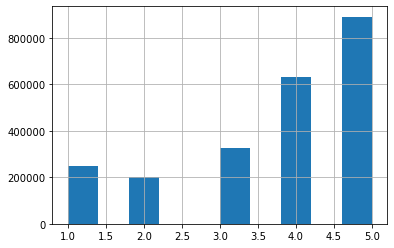

In [73]:
train_df.stars.hist()

## users histogram stars by groups

In [124]:
business_ids_to_size = train_df.groupby('business_id_int').size()
group1 = business_ids_to_size >= 1000
group2 = (business_ids_to_size < 1000) & (business_ids_to_size >= 100)
group3 = (business_ids_to_size < 100) & (business_ids_to_size >= 20)
group4 = (business_ids_to_size < 20)

group_1_indexes = train_df.business_id_int.isin(business_ids_to_size[group1].to_numpy())
group_2_indexes = train_df.business_id_int.isin(business_ids_to_size[group2].to_numpy())
group_3_indexes = train_df.business_id_int.isin(business_ids_to_size[group3].to_numpy())
group_4_indexes = train_df.business_id_int.isin(business_ids_to_size[group4].to_numpy())

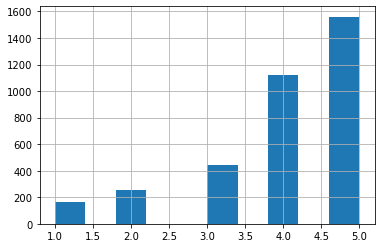

In [125]:
train_df[group_1_indexes].stars.hist()

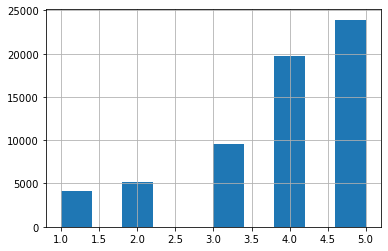

In [126]:
train_df[group_2_indexes].stars.hist()

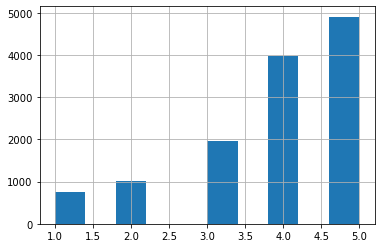

In [127]:
train_df[group_3_indexes].stars.hist()

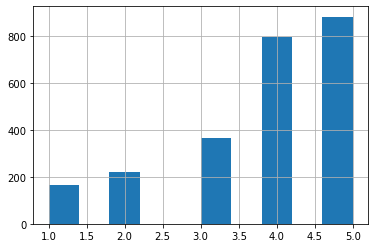

In [128]:
train_df[group_4_indexes].stars.hist()

# Train-test intesections between user/business

In [132]:
print("The users are equal:", sorted(train_df.user_id.unique()) == sorted(test_df.user_id.unique()))
print("The businesses are equal:", sorted(train_df.business_id.unique()) == sorted(test_df.business_id.unique()))

The users are equal: True
The businesses are equal: False


In [154]:
print("Is user ranked a business more than one time:")
train_df['user_id_business_id'] = train_df.user_id + "_" + train_df.business_id
not (len(train_df.user_id_business_id) == len(train_df.user_id_business_id.unique()))

Is user ranked a business more than one time:


True

In [155]:
train_df[(train_df.user_id_int == 47631) & (train_df.business_id_int == 8913)]

,Unnamed: 0,user_id,business_id,stars,text,user_id_int,business_id_int,user_id_business_id
1332247,1557674,XNzChtoNOw706kps82x0Kg,xKQVtEWiPK6hq0DljVnAfg,1.0,"This place continues to be a shit hole, with P...",47631,8913,XNzChtoNOw706kps82x0Kg_xKQVtEWiPK6hq0DljVnAfg
1461211,1557675,XNzChtoNOw706kps82x0Kg,xKQVtEWiPK6hq0DljVnAfg,1.0,My mother recently spent a good deal of time i...,47631,8913,XNzChtoNOw706kps82x0Kg_xKQVtEWiPK6hq0DljVnAfg
